In [1]:
import turbo as tb
import preprocessing as pr
import labeling as lb
import classification as cl
import rul_dataframe as rd
import plots as pl

import copy
import numpy as np
import pandas as pd

import torch, torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [2]:
tr, te, rl = tb.getTFDataset(set = 4)
tb.addTFlinear(tr, te, rl)
tr_df = rd.RUL_DataFrame(df = tr, label_cols = ['linear'])
te_df = rd.RUL_DataFrame(df = te, label_cols = ['linear'])

In [3]:
rul_df = copy.deepcopy(tr_df)
rul_df_test = copy.deepcopy(te_df)

In [4]:
pre = pr.Preprocessing()
clf = cl.Classification()
lbl = lb.Labeling()

In [5]:
clf.fit_kmeans(rul_df = rul_df)
pre.one_hot_encode(rul_df = rul_df)
pre.c_drop_zero_variance(rul_df = rul_df , c_cols = rul_df.categ_cols, eps = 0.0001)
pre.c_scale(rul_df = rul_df, c_cols = rul_df.categ_cols)
pre.exponential_smooth(rul_df = rul_df, alpha = 0.4)

In [6]:
trul = tb.TorchRULDataset(rul_df = rul_df, label = 'linear')

Note due to possibly variing sequence lenghts, select batch size 1 (default) in DataLoader


In [7]:
tdf_loader = DataLoader(trul, batch_size = 1)

In [9]:
for batch_idx, data in enumerate(tdf_loader):
    print('batch {}, x shape {}, y shape {}'.format(batch_idx, data[0].shape, data[1].shape))

batch 0, x shape torch.Size([1, 255, 16]), y shape torch.Size([1, 255])
batch 1, x shape torch.Size([1, 321, 16]), y shape torch.Size([1, 321])
batch 2, x shape torch.Size([1, 299, 16]), y shape torch.Size([1, 299])
batch 3, x shape torch.Size([1, 307, 16]), y shape torch.Size([1, 307])
batch 4, x shape torch.Size([1, 274, 16]), y shape torch.Size([1, 274])
batch 5, x shape torch.Size([1, 193, 16]), y shape torch.Size([1, 193])
batch 6, x shape torch.Size([1, 331, 16]), y shape torch.Size([1, 331])
batch 7, x shape torch.Size([1, 221, 16]), y shape torch.Size([1, 221])
batch 8, x shape torch.Size([1, 230, 16]), y shape torch.Size([1, 230])
batch 9, x shape torch.Size([1, 334, 16]), y shape torch.Size([1, 334])
batch 10, x shape torch.Size([1, 354, 16]), y shape torch.Size([1, 354])
batch 11, x shape torch.Size([1, 301, 16]), y shape torch.Size([1, 301])
batch 12, x shape torch.Size([1, 272, 16]), y shape torch.Size([1, 272])
batch 13, x shape torch.Size([1, 256, 16]), y shape torch.Siz

In [111]:
data[1].squeeze()

tensor([183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170,
        169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156,
        155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142,
        141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128,
        127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114,
        113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,
         99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,  86,
         85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,  74,  73,  72,
         71,  70,  69,  68,  67,  66,  65,  64,  63,  62,  61,  60,  59,  58,
         57,  56,  55,  54,  53,  52,  51,  50,  49,  48,  47,  46,  45,  44,
         43,  42,  41,  40,  39,  38,  37,  36,  35,  34,  33,  32,  31,  30,
         29,  28,  27,  26,  25,  24,  23,  22,  21,  20,  19,  18,  17,  16,
         15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,  

In [90]:
fc1 = nn.Linear(16, 1)
lstm = nn.LSTM(input_size=32, hidden_size=16, batch_first=True)

In [67]:
out = fc1(data[0].float())

In [68]:
out, _ = lstm(out)

In [91]:
out = fc1(out)

In [110]:
torch.squeeze(out)

tensor([0.1281, 0.1718, 0.1578, 0.1538, 0.1634, 0.1657, 0.1559, 0.1509, 0.1720,
        0.1820, 0.1829, 0.1698, 0.1622, 0.1551, 0.1448, 0.1498, 0.1660, 0.1816,
        0.1837, 0.1743, 0.1771, 0.1921, 0.1760, 0.1477, 0.1392, 0.1468, 0.1597,
        0.1717, 0.1743, 0.1758, 0.1822, 0.1811, 0.1884, 0.1720, 0.1628, 0.1641,
        0.1472, 0.1465, 0.1458, 0.1446, 0.1580, 0.1598, 0.1632, 0.1619, 0.1770,
        0.1782, 0.1675, 0.1539, 0.1474, 0.1502, 0.1588, 0.1658, 0.1669, 0.1649,
        0.1706, 0.1832, 0.1928, 0.1939, 0.1878, 0.1627, 0.1550, 0.1186, 0.1079,
        0.1234, 0.1353, 0.1362, 0.1349, 0.1469, 0.1506, 0.1521, 0.1576, 0.1675,
        0.1819, 0.1830, 0.1762, 0.1826, 0.1847, 0.1853, 0.1866, 0.1952, 0.1861,
        0.1595, 0.1508, 0.1336, 0.1534, 0.1565, 0.1739, 0.1811, 0.1924, 0.1871,
        0.1773, 0.1753, 0.1668, 0.1595, 0.1661, 0.1637, 0.1650, 0.1682, 0.1697,
        0.1473, 0.1321, 0.1385, 0.1404, 0.1473, 0.1547, 0.1654, 0.1705, 0.1605,
        0.1594, 0.1373, 0.1386, 0.1423, 

In [103]:
out.size()

torch.Size([1, 184, 1])

In [8]:
class BaseLSTM(nn.Module):
    def __init__(self, input_dim):
        super(BaseLSTM, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.lstm = nn.LSTM(input_size=32, hidden_size=16, batch_first=True)
        self.fc2 =  nn.Linear(16, 8)
        self.fc3 = nn.Linear(8,1)

        self.sg = nn.Sigmoid()

    def forward(self, x):
        h0 = torch.zeros(1, 1, 16).requires_grad_()
        c0 = torch.zeros(1, 1, 16).requires_grad_()
        out = self.fc1(x)
        # out = self.sg(out)
        out, _ = self.lstm(out, (h0.detach(), c0.detach()))
        # out = self.sg(out)
        out = self.fc2(out)
        # out = self.sg(out)
        out = self.fc3(out)
        return torch.squeeze(out)

In [10]:
model = BaseLSTM(16)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
criterion = nn.MSELoss()

In [118]:
[param.nelement() for param in model.parameters()]

[512, 32, 2048, 1024, 64, 64, 128, 8, 8, 1]

In [119]:
print(model)

BaseLSTM(
  (fc1): Linear(in_features=16, out_features=32, bias=True)
  (lstm): LSTM(32, 16, batch_first=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (sg): Sigmoid()
)


In [140]:
[16*32, 32, 32*16*4, 16*16*4, 16*4, 16*4, 16*8, 8, 8*1, 1]

[512, 32, 2048, 1024, 64, 64, 128, 8, 8, 1]

In [144]:
len(tdf_loader)

249

In [10]:
epochs = 30
model.train()

for epoch in range(epochs):
    loss = 0
    for x, y in tdf_loader:
        
        optimizer.zero_grad()

        outputs = model(x.float())

        train_loss = criterion(outputs, y.float().squeeze())

        train_loss.backward()
        optimizer.step()
        loss += train_loss.item()

    loss = loss / len(tdf_loader)
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/30, loss = 20068.713804
epoch : 2/30, loss = 12736.130764
epoch : 3/30, loss = 6600.810938
epoch : 4/30, loss = 4044.300922
epoch : 5/30, loss = 3257.312162
epoch : 6/30, loss = 2926.417648
epoch : 7/30, loss = 2734.808015
epoch : 8/30, loss = 2637.761406
epoch : 9/30, loss = 2594.970708
epoch : 10/30, loss = 2630.958771
epoch : 11/30, loss = 2559.089794
epoch : 12/30, loss = 2543.719966
epoch : 13/30, loss = 2532.324526
epoch : 14/30, loss = 2524.131187
epoch : 15/30, loss = 2517.680276
epoch : 16/30, loss = 2512.773169
epoch : 17/30, loss = 2508.898404
epoch : 18/30, loss = 2506.323582
epoch : 19/30, loss = 2503.750999
epoch : 20/30, loss = 2499.897652
epoch : 21/30, loss = 2498.840508
epoch : 22/30, loss = 2497.020199
epoch : 23/30, loss = 2494.009878
epoch : 24/30, loss = 2490.918678
epoch : 25/30, loss = 2487.288650
epoch : 26/30, loss = 2485.759836
epoch : 27/30, loss = 2484.201119
epoch : 28/30, loss = 2482.403019
epoch : 29/30, loss = 2480.510607
epoch : 30/30, loss =

In [11]:
outputs.

tensor([167.1890, 158.2570, 150.7437, 143.1125, 137.8179, 136.2629, 137.1512,
        134.6899, 135.4704, 136.1669, 134.8269, 124.8171, 134.5493, 133.9282,
        133.8553, 135.3801, 130.3645, 126.1989, 130.6825, 137.7969, 134.6448,
        128.7177, 133.0797, 136.5310, 134.1321, 137.4084, 138.5406, 131.0592,
        134.7469, 129.2083, 134.2466, 133.0200, 129.1849, 129.8932, 130.3018,
        125.7955, 125.0331, 115.3323, 122.0411, 131.9333, 134.8425, 132.9538,
        135.4331, 135.7385, 134.9294, 123.5684, 130.4899, 129.0556, 127.8445,
        119.3496, 112.9079, 112.5441, 105.0310, 108.5204, 116.6624, 111.4973,
        117.1595, 115.7548, 120.2723, 117.6836, 118.2537, 128.4524, 126.1115,
        127.0397, 112.3955, 100.6933, 120.2475, 113.3083, 108.3788, 117.5112,
        110.7803, 112.7252, 120.3410, 110.9468, 118.6429, 105.4054, 101.3493,
         98.3162, 101.5562, 107.1495, 115.0590, 109.0440, 107.1345, 107.4275,
        122.9677, 106.8619, 106.8573, 101.6837, 104.3613,  90.59

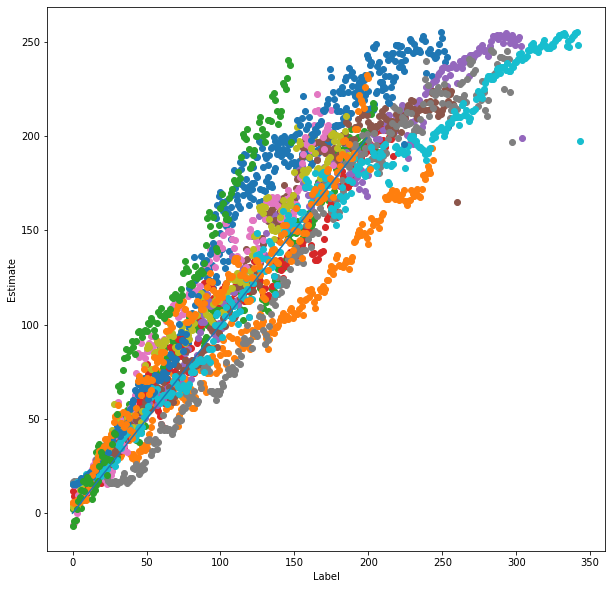

In [155]:
import matplotlib.pyplot as plt
with torch.no_grad():
    plt.figure(figsize=(10,10))
    for batch_idx, data in enumerate(tdf_loader):
        if batch_idx % 20 == 0:
            y = model(data[0].float())
            y1 = np.squeeze(y)
            y2 = np.squeeze(data[1])
            plt.scatter(y2,y1)
    plt.xlabel('Label')
    plt.ylabel('Estimate')
    plt.plot(range(200))
    plt.show()

In [9]:
from topologylayer.nn import AlphaLayer, SumBarcodeLengths, PartialSumBarcodeLengths, BarcodePolyFeature

t = AlphaLayer(maxdim=0)
f = BarcodePolyFeature(0,1,0)

In [22]:
outputs.unsqueeze(dim=1)

tensor([[-0.1699],
        [-0.1716],
        [-0.1726],
        [-0.1850],
        [-0.1908],
        [-0.1895],
        [-0.1740],
        [-0.1640],
        [-0.1644],
        [-0.1601],
        [-0.1606],
        [-0.1647],
        [-0.1731],
        [-0.1589],
        [-0.1613],
        [-0.1847],
        [-0.2074],
        [-0.2046],
        [-0.1960],
        [-0.1937],
        [-0.1862],
        [-0.1812],
        [-0.1770],
        [-0.1667],
        [-0.1679],
        [-0.1695],
        [-0.1643],
        [-0.1704],
        [-0.1883],
        [-0.1971],
        [-0.1981],
        [-0.1876],
        [-0.1804],
        [-0.1879],
        [-0.1821],
        [-0.1801],
        [-0.1811],
        [-0.1793],
        [-0.1830],
        [-0.1850],
        [-0.1776],
        [-0.1845],
        [-0.1961],
        [-0.2134],
        [-0.2061],
        [-0.2075],
        [-0.1967],
        [-0.1805],
        [-0.1721],
        [-0.1777],
        [-0.1936],
        [-0.2004],
        [-0.

In [10]:
model2 = BaseLSTM(16)
optimizer = torch.optim.Adam(model2.parameters(), lr = 1e-3)
criterion = nn.MSELoss()

In [12]:
o = model2(next(iter(tdf_loader))[0])

In [13]:
f(t(o.unsqueeze(1)))

tensor(0.0009, grad_fn=<SumBackward0>)

In [ ]:
epochs = 30
model2.train()

for epoch in range(epochs):
    loss = 0
    d_loss = 0
    t_loss = 0
    for x, y in tdf_loader:
        optimizer.zero_grad()

        outputs = model2(x.float())
        
        topo_loss = f(t(outputs.unsqueeze(dim=1)))

        data_loss = criterion(outputs, y.float().squeeze())
        train_loss = data_loss + 0.1 * topo_loss

        train_loss.backward()
        optimizer.step()
        d_loss += data_loss.item()
        t_loss += topo_loss.item()
        loss += train_loss.item()

    loss /= len(tdf_loader)
    d_loss /= len(tdf_loader)
    t_loss /= len(tdf_loader)
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))
    print("epoch : {}/{}, d_loss = {:.6f}".format(epoch + 1, epochs, d_loss))
    print("epoch : {}/{}, t_loss = {:.6f}".format(epoch + 1, epochs, t_loss))

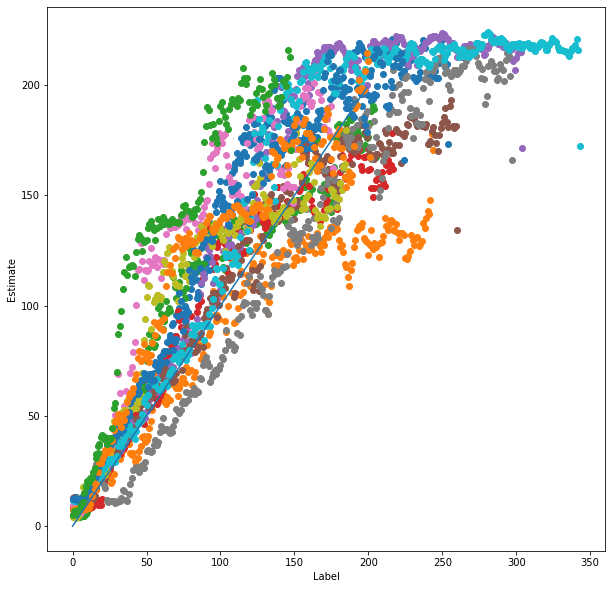

In [210]:
with torch.no_grad():
    plt.figure(figsize=(10,10))
    for batch_idx, data in enumerate(tdf_loader):
        if batch_idx % 20 == 0:
            y = model2(data[0].float())
            y1 = np.squeeze(y)
            y2 = np.squeeze(data[1])
            plt.scatter(y2,y1)
    plt.xlabel('Label')
    plt.ylabel('Estimate')
    plt.plot(range(200))
    plt.show()

In [200]:
print(model2)

BaseLSTM(
  (fc1): Linear(in_features=16, out_features=32, bias=True)
  (lstm): LSTM(32, 16, batch_first=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (sg): Sigmoid()
)


In [13]:
data[1].squeeze()

tensor([183., 182., 181., 180., 179., 178., 177., 176., 175., 174., 173., 172.,
        171., 170., 169., 168., 167., 166., 165., 164., 163., 162., 161., 160.,
        159., 158., 157., 156., 155., 154., 153., 152., 151., 150., 149., 148.,
        147., 146., 145., 144., 143., 142., 141., 140., 139., 138., 137., 136.,
        135., 134., 133., 132., 131., 130., 129., 128., 127., 126., 125., 124.,
        123., 122., 121., 120., 119., 118., 117., 116., 115., 114., 113., 112.,
        111., 110., 109., 108., 107., 106., 105., 104., 103., 102., 101., 100.,
         99.,  98.,  97.,  96.,  95.,  94.,  93.,  92.,  91.,  90.,  89.,  88.,
         87.,  86.,  85.,  84.,  83.,  82.,  81.,  80.,  79.,  78.,  77.,  76.,
         75.,  74.,  73.,  72.,  71.,  70.,  69.,  68.,  67.,  66.,  65.,  64.,
         63.,  62.,  61.,  60.,  59.,  58.,  57.,  56.,  55.,  54.,  53.,  52.,
         51.,  50.,  49.,  48.,  47.,  46.,  45.,  44.,  43.,  42.,  41.,  40.,
         39.,  38.,  37.,  36.,  35.,  3

In [12]:
tp2D = LevelSetLayer2D((len(data[1].squeeze()),len(data[1].squeeze())))

In [ ]:
tp2D(data[1].squeeze(),data[1].squeeze())

: 

: 